22/11/2019

The code here is close to Nielsen. Each activation is treated as a column vector, even the last one which for XOR is just a simple number and is encloded in a shape (1,1) column vector of just one row, i.e if activation value of output neuron is a, then it is computed as np.array([[a]]).

Can easily adapt code here for the MLP excercises and the Iris classification problem.
But you may need to use more than 2 hidden neurons and more than 1 output neuron.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
def sigm(z):
    return  1.0/(1.0 + np.exp(-z))

def sigm_deriv(z):
    a = sigm(z)
    return a*(1 - a)

In [3]:
class XOR_MLP:
    def __init__(self):
        # Input layer: Two neurons
        self.train_inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
        self.train_outputs = np.array([0,1,1,0])
          
        np.random.seed(23)

        # hidden layer of 2 neurons
        #(2,2) there are two neurons in the hidden layer 
        # Each neuron is connected to two input neurons
        self.w2 = np.random.randn(2,2)

        # (2,1) corresponds to one bias term of the two neurons in the hidden
        self.b2 = np.random.randn(2,1)
        
        # Output layer has 1 neuron
        # (1,2) indicates that there is one neuron connected to two neurons in the hidden layer
        self.w3 = np.random.randn(1,2)

        # This indicates a single bias term of the output neuron
        self.b3 = np.random.randn(1,1)
        

    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)            
        return a3s

    
    def backprop(self, xs, ys):
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x,y in zip(xs,ys):            
            a1 = x.reshape(2,1)              # convert input vector x into (2,1) column vector
            z2 = self.w2.dot(a1) + self.b2   # so will z2 and a2
            a2 = sigm(z2)                    # column vector shape (2,1)
            
            z3 = self.w3.dot(a2) + self.b3   # a simple number in a (1,1) column vector
            a3 = sigm(z3)                    # so is a3
            
            delta3 = (a3-y) * sigm_deriv(z3)                   # delta3.shape is (1,1)
           
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
        
           
            cost += ((a3 - y)**2).sum() 
        
        n = len(ys)  # number of training vectors    
        
        # get the average change per training input  
        # return the average adjustments to the biases and weights 
        # in each layer and the cost
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
        
    def train(self, epochs, eta):
        xs = self.train_inputs
        ys = self.train_outputs
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost
                
                
            
    

[[0.13441229 0.10816814 0.14522425 0.12453942]]
[[0.08467026 0.91859922 0.91853706 0.08963025]]


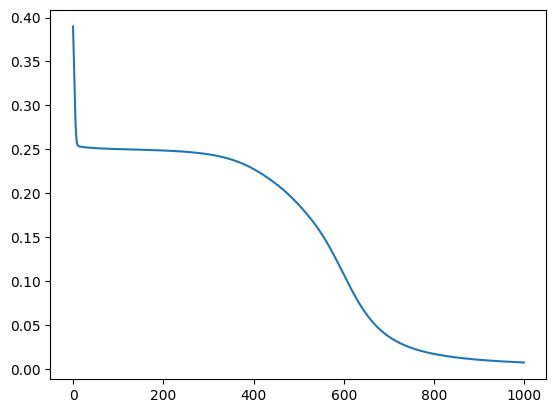

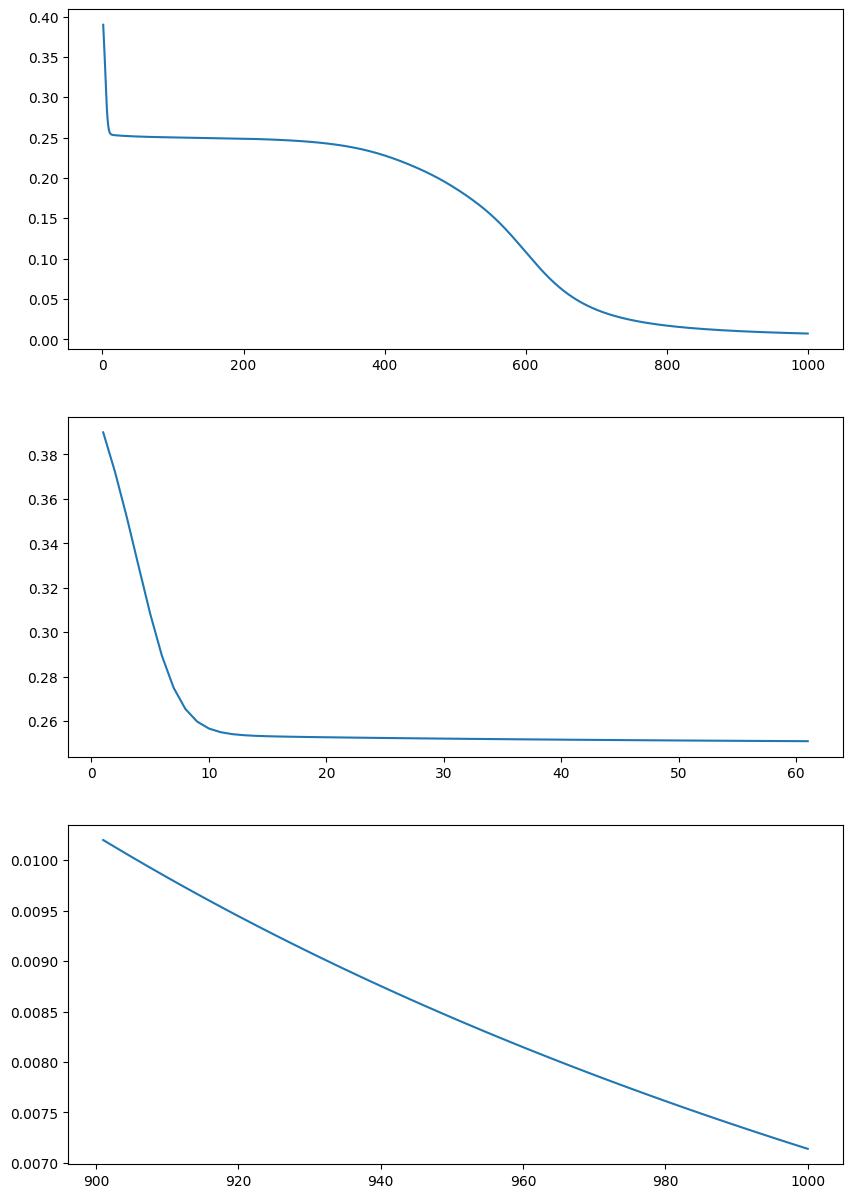

In [4]:
xor = XOR_MLP()
xs = xor.train_inputs.T

print(xor.feedforward(xs))

epochs = 1000
c = xor.train(epochs, 3.0)

print(xor.feedforward(xs))

x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(3,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)
plt.subplot(3,1,2)
plt.plot(x_axis[:61], c[:61])
plt.subplot(3,1,3)
plt.plot(x_axis[900:], c[900:])





Exercise 1: copy and adapt the above XOR_MLP code so that it uses 3 neurons in the hidden layer. Train such a MLP and see if it learns faster than the previous one.

In [5]:
# Exercise 1


In [6]:
# A more general purpose MLP with m input neurons, n hidden neurons and o output neuron
# You must complete this code yourself
class MLP:
    def __init__(self, m, n, o):
        self.m = m
        self.n = n

        # Initialize the inputs and outputs as row vectors
        self.inputs = np.zeros((1, m))
        self.output = np.zeros((1, o))
        
        np.random.seed(23)
        # hidden layer of N neurons
        # For each hidden layer neuron, they will be connected to m inputs neurons
        self.w2 = np.random.randn(n,m)

        # For each hidden layer neuron there will be a single bias term per neuron
        self.b2 = np.random.randn(n,1)
        
        # Every output neuron will be connected to n hidden neurons
        self.w3 = np.random.randn(o,n)

        # Each output neuron will have a single bias term
        self.b3 = np.random.randn(o,1)
        

    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)

        a3s = sigm(self.w3.dot(a2s) + self.b3)            
        return a3s
    
    def reshape_properties(self, xs, ys):
        """
        Reshape the input features and labels for compatibility with the MLP.

        :param xs: Input features.
        :param ys: Output labels.
        :return: Tuple of reshaped (features, labels).
        """
        expected_samples = xs.shape[0]  # Assuming each sample is a row in xs

        if ys.shape[0] != expected_samples:
            raise ValueError(f"Shape mismatch: xs has {expected_samples} samples, but ys has {ys.shape[0]} labels.")

        # Reshaping assuming the network expects each sample as a column in xs and ys
        xs_reshaped = xs.T
        ys_reshaped = ys.T if ys.ndim > 1 else ys.reshape(1, -1)

        return xs_reshaped, ys_reshaped

        
    
    def backprop(self, xs, ys):
        # These will contain the change in the weights and bias of the hidden layer
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        # These will reflect the changes in the weights and bias of the output layer
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x,y in zip(xs,ys):            
            a1 = x.reshape(self.m,1)              # convert input vector x into (m,1) column vector
            y = y.reshape(-1, 1)      # Ensure y is a column vector

                
            z2 = self.w2.dot(a1) + self.b2   # so will z2 and a2
            a2 = sigm(z2)                    
            z3 = self.w3.dot(a2) + self.b3   # a simple number in a (1,1) column vector
            a3 = sigm(z3)                    # so is a3


            delta3 = (a3-y) * sigm_deriv(z3)                   # delta3.shape is (1,1)
            delta2 = np.multiply(sigm_deriv(z2), self.w3.T.dot(delta3))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            
            del_b3 = del_b3 + delta3
            del_w3 = del_w3 + delta3.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            del_b2 = del_b2 + delta2

            del_w2 = del_w2 + delta2.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
    
           
            cost += ((a3 - y)**2).sum() 
        
        n = len(ys)  # number of training vectors    
        
        # get the average change per training input  
        # return the average adjustments to the biases and weights 
        # in each layer and the cost
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
        
        
    def train(self, epochs, eta, train_inputs, train_outputs):
        xs = train_inputs
        ys = train_outputs
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost
                
         

In [7]:
# Are the outputs of these correct?
# number of inputs, number of hidden layer, number of outputs
p1 = MLP(3,4,2)

# p1.w2 will result in a matrix of size 4x3
# p1.w3 will results in a matrix 2x4
print('\n W2 = \n',p1.w2, '\n W3 = \n', p1.w3, '\n')

p2 = MLP(4,6,3)
# p2.w2 will result 6x4 matrix 
print('\n W2 = \n', p2.w2, '\nW3 = \n', p2.w3, '\n')



 W2 = 
 [[ 0.66698806  0.02581308 -0.77761941]
 [ 0.94863382  0.70167179 -1.05108156]
 [-0.36754812 -1.13745969 -1.32214752]
 [ 1.77225828 -0.34745899  0.67014016]] 
 W3 = 
 [[ 0.44173637  1.12887685 -1.83806777 -0.93876863]
 [-0.20184052  1.04537128  0.53816197  0.81211867]] 


 W2 = 
 [[ 0.66698806  0.02581308 -0.77761941  0.94863382]
 [ 0.70167179 -1.05108156 -0.36754812 -1.13745969]
 [-1.32214752  1.77225828 -0.34745899  0.67014016]
 [ 0.32227152  0.06034293 -1.04345    -1.00994188]
 [ 0.44173637  1.12887685 -1.83806777 -0.93876863]
 [-0.20184052  1.04537128  0.53816197  0.81211867]] 
W3 = 
 [[ 1.41531998  0.45771098  0.72887584  1.96843473 -0.54778801 -0.67941827]
 [-2.50623032  0.14696049  0.60619549 -0.02253889  0.01342226  0.93594489]
 [ 0.42062266  0.41161964 -0.07132392 -0.04543758  1.04088597 -0.09403473]] 



BEFORE TRAINING:  [[0.4321933  0.52195082 0.43163385 0.51250656]]
AFTER TRAINING:  [[0.03578758 0.93617278 0.93453079 0.08238487]]


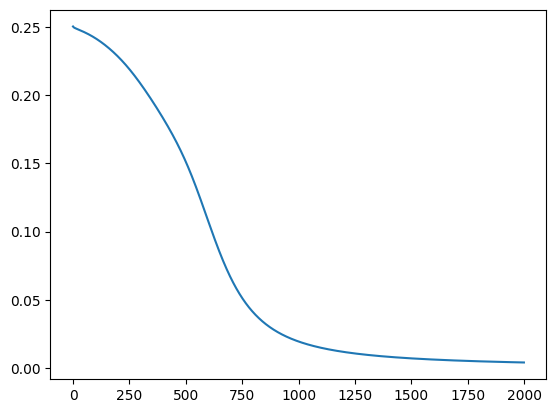

In [8]:
# Problem 1
prob1 = MLP(3, 4, 1)
prob1_inputs = np.array([[0,0,1], [0,1,1], [1,0,1],[1,1,1]])
prob1_outputs = np.array([0, 1, 1, 0])

print("BEFORE TRAINING: ", prob1.feedforward(prob1_inputs.T))

prob1.train(2000, 1.2, prob1_inputs, prob1_outputs)

print("AFTER TRAINING: ", prob1.feedforward(prob1_inputs.T))

BEFORE TRAINING:  [[0.65996267 0.57436115 0.56836673 0.54440382 0.66146227 0.52241302
  0.61336377]
 [0.56899739 0.54110372 0.51610062 0.50668867 0.57061445 0.51577405
  0.54295979]]
AFTER TRAINING:  [[0.89661839 0.47344371 0.94877078 0.83552808 0.9337792  0.63141925
  0.91750887]
 [0.5282077  0.67241408 0.49277411 0.58731135 0.49859176 0.64100653
  0.51908589]]


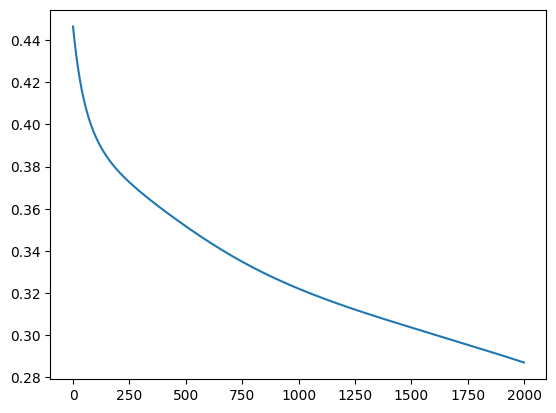

In [9]:
# Problem 2
x_training = np.array([
              [1,   1,  0],
              [1,  -1, -1],
              [-1,  1,  1],
              [-1, -1,  1],
              [0,   1, -1],
              [0,  -1, -1],
              [1,   1,  1]
              ])

y_training = np.array([
              [1, 0],
              [0, 1],
              [1, 1],
              [1, 0],
              [1, 0],
              [1, 1],
              [1, 1]
            ])

prob2 = MLP(3, 2, 2)

print('BEFORE TRAINING: ', prob2.feedforward(x_training.T))

prob2.train(2000, 0.1, x_training, y_training) 

print('AFTER TRAINING: ', prob2.feedforward(x_training.T))


In [10]:
# A more general purpose MLP with m input neurons, n hidden neurons and o output neuron
# You must complete this code yourself
class MLP_Transporation:
    def __init__(self, m, n, o):
        self.m = m
        self.n = n

        # Initialize the inputs and outputs as row vectors
        self.inputs = np.zeros((1, m))
        self.output = np.zeros((1, o))
        
        np.random.seed(23)
        # hidden layer of N neurons
        # For each hidden layer neuron, they will be connected to m inputs neurons
        self.w2 = np.random.randn(n,m)

        # For each hidden layer neuron there will be a single bias term per neuron
        self.b2 = np.random.randn(n,1)
        
        # Every output neuron will be connected to n hidden neurons
        self.w3 = np.random.randn(o,n)

        # Each output neuron will have a single bias term
        self.b3 = np.random.randn(o,1)
        

    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)

        a3s = sigm(self.w3.dot(a2s) + self.b3)            
        return a3s
        
    
    def backprop(self, xs, ys):
        # Initialize the changes in weights and biases for both layers
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0

        for i in range(xs.shape[1]):  # Iterate over each data point
            a1 = xs[:, [i]]  # Extract the i-th data point as a column vector
            y = ys[:, [i]]  # Extract the corresponding output

            # Forward pass
            z2 = self.w2.dot(a1) + self.b2
            a2 = sigm(z2)
            z3 = self.w3.dot(a2) + self.b3
            a3 = sigm(z3)

            # Backward pass
            delta3 = (a3 - y) * sigm_deriv(z3)
            delta2 = np.multiply(sigm_deriv(z2), self.w3.T.dot(delta3))

            del_w3 += delta3.dot(a2.T)
            del_b3 += delta3
            del_w2 += delta2.dot(a1.T)
            del_b2 += delta2

            cost += ((a3 - y) ** 2).sum()

        n = xs.shape[1]  # Number of training vectors

        # Average adjustments for weights and biases
        return del_b2 / n, del_w2 / n, del_b3 / n, del_w3 / n, cost / n

        
    def train(self, epochs, eta, train_inputs, train_outputs):
        xs = train_inputs
        ys = train_outputs
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost

Before training: [[0.71938321 0.63743008 0.65091557 0.71930795 0.63743008 0.6765206
  0.65213801 0.60026578 0.61356457 0.58304925]
 [0.77700197 0.78351325 0.79412446 0.78494032 0.78351325 0.77564969
  0.78290081 0.78198423 0.7645258  0.78127106]
 [0.05112956 0.06468518 0.0465782  0.04203892 0.06468518 0.06532407
  0.06142651 0.07894091 0.11134526 0.08632604]]
After training: [[0.05685037 0.13413239 0.81052473 0.16266767 0.13413239 0.92144336
  0.97713587 0.98176801 0.98143928 0.98183588]
 [0.05329888 0.13211225 0.83568571 0.15391797 0.13211225 0.91824422
  0.97698909 0.98096914 0.98062428 0.98102449]
 [0.05391785 0.13002757 0.81605851 0.15780124 0.13002757 0.92391851
  0.97843061 0.98281646 0.98250088 0.98288037]]
Recommended Transport Mode: Car


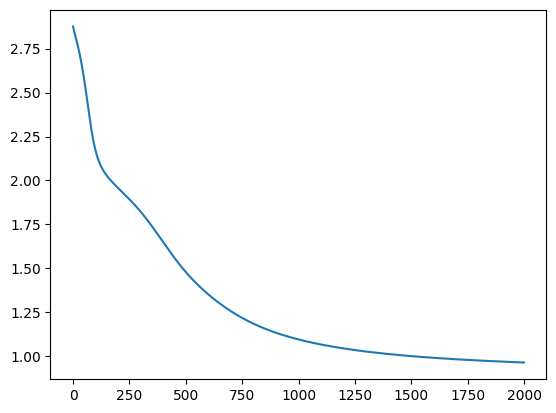

In [11]:
# Problem 3
# gender: male = 0, female = 1 
# CarOwnership: No = 0, Yes = 1
# TravelCost: Cheap = 0, Standard = 1, Expensive = 2
# IncomeLevel: Low = 0, Medium = 1, High = 2
# TransportationMode: Bus = 0, Train = 1, Car = 2

# Read the data
transport_data = pd.read_csv("../data/transport.csv")
transport_modes = {0: 'Bus', 1: 'Train', 2: 'Car'}

# Process the data
transport_data['Gender'] = transport_data['Gender'].map({'Male' : 0, 'Female' : 1})
transport_data['TravelCost'] = transport_data['TravelCost'].map({'Cheap' : 0, 'Standard' : 1, 'Expensive' : 2})
transport_data['IncomeLevel'] = transport_data['IncomeLevel'].map({'Low' : 0, 'Medium' : 1, 'High' : 2})
transport_data['TransportationMode'] = transport_data['TransportationMode'].map({'Bus' : 0, 'Train' : 1, 'Car' : 2})

# Define the neural network
# 4 representing the input layer i.e., features of the dataset: gender, car ownership, travelcost, incomelevel
# Start off with 1 hidden layer, may change
# 3 output neurons corresponse to the number of travel modes i.e., bus, train, car
transport_mlp = MLP_Transporation(4, 2, 3)

# Prepare the inputs for the network
transport_features = transport_data[['Gender', 'CarOwnership', 'TravelCost', 'IncomeLevel']].to_numpy().T
transport_labels = transport_data[['TransportationMode']].to_numpy().T

print(f'Before training: {transport_mlp.feedforward(transport_features)}')
transport_mlp.train(2000, 0.2, transport_features, transport_labels)
print(f'After training: {transport_mlp.feedforward(transport_features)}')

# Female without car ownership, willing to pay expensive travel cost and having medium income level
female_predict_input = np.array([1, 0, 2, 1]).reshape(-1, 1)

female_predict = np.argmax(transport_mlp.feedforward(female_predict_input))

print(f'Recommended Transport Mode: {transport_modes.get(female_predict)}')